# Decision Trees - Basics

### Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

## Some Important Terminologies

![](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_2.png)

#### Root Node
- It represents entire population or sample and this further gets divided into two or more homogeneous sets.

#### Splitting
- It is a process of dividing a node into two or more sub-nodes.

#### Decision Node
- When a sub-node splits into further sub-nodes, then it is called decision node.

#### Leaf/ Terminal Node
- Nodes do not split is called Leaf or Terminal node.

#### PruningPruning
- When we remove sub-nodes of a decision node, this process is called pruning. You can say opposite process of splitting.

#### Branch / Sub-Tree
- A sub section of entire tree is called branch or sub-tree.

#### Parent and Child Node
- A node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.

## Advantages of Decision Tress

- Simple to understand and to interpret. Trees can be visualised.
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Decision tree is considered to be a non-parametric method. This means that decision trees have no assumptions about the space distribution and the classifier structure.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.


## Disadvantages of Decision Trees

- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.


## Training and Visualizing a Decision Tree

### Classification with Decision Trees

#### Prior Installations
##### Install Graphviz
1. brew install grpahviz ( for mac only )
2. python -m pip install graphviz

In [101]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
print(iris.feature_names)
print(iris.target)
df = pd.DataFrame(iris.data, columns=iris.feature_names)

df.describe()


['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
X = iris.data[:, 2:]
Y = iris.target
y = Y

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,Y)


In [226]:
from sklearn.tree import export_graphviz

def image_path(fig_id):
    return fig_id

export_graphviz(tree_clf,
               out_file=image_path("iris_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

dot_data = export_graphviz(tree_clf,
               out_file=None,
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

['petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


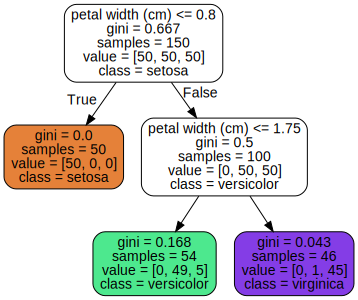

In [228]:
import graphviz

graph = graphviz.Source(dot_data)

# Saves the graph to iris.pdf file
graph.render("iris")
print(iris.feature_names[2:])
print(iris.target_names)

# Matplotlib inline drawing of graph
graph


In [63]:
### The 'dot' system utility to convert the .dot file, generated from export_graphviz command, to a .png file

### ! dot -Tpng iris_tree.dot -o iris_tree.png




![1](iris_tree.png)

#### Figure-1: Classification with Decision trees


In [ ]:
print(tree_clf.predict)

#### Explaining the above figure-1
Suppose you find an iris flower and you want to classify it.

You start at the root node, depth = 0. This node asks whether the flower petal length is greater than 2.45 cm. If it is then you move down to the  root's left child node at depth = 1. In this case it is a leaf node so it does not ask any questions.. You can simply look at the predict class for thst node and the Decision tree classifier predicts that your flower is an Iris-setosa( class = Setosa ).

Now suppose you find another flower whose petal length is greater than 2.45. You must move down to the root's right child at depth = 1, which is not a leaf node, so it asks another question: is petal width smaller than 1.75 cm ? if yes then your flower is most likely class = versicolor else class = virginia.



###### Explaining node attributes


1. Samples: Counts how many training instances it applies to. E.g: 100 training instances have a petal length greater than 2.45( depth = 1, right ).

2. Value:  This tells how many training instances of each class this node applies to. E.g: the bottom right applies to 0 Iris-Setosa, 1 Iris-Versicolor and 45 Iris-Virginia.

3. gini: It's a measure of 'gini' impurity. A node with gini=0 is a pure node.

### Regression with Decision Trees

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [43]:
export_graphviz(tree_reg,
               out_file=image_path("iris_reg_tree.dot"),
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
               )

In [44]:
! dot -Tpng iris_reg_tree.dot -o iris_reg_tree.png


![2](iris_reg_tree.png)

##### Figure-2: Regression using Decision Trees

#### The Tree looks similar to the figure-1 except that it predicts a values instead of a class.

### Predictions

* DTs require very little data prep. No feature scaling & centering.
* SciKit uses CART algorithm. (only two children per node.) Other algos, ex ID3, can build DTs with >2 children per node.
* *gini* attribute refers to a node's "impurity" (gini=0 if all applicable training instances belong to same class.)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


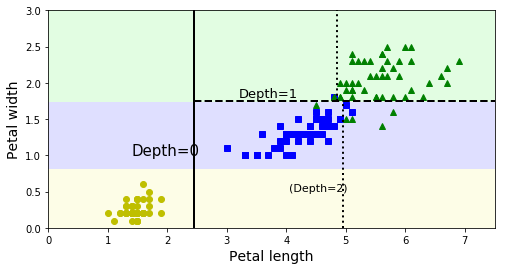

In [45]:
# Plot DT decision boundaries
# Depth=0: root node (petal length=2.45cm)
# Depth=1: right node splits @ 1.75cm
# Stops at max_depth = 2.
# Vertical dotted line shows boundary if max_depth set = 3.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

#save_fig("decision_tree_decision_boundaries_plot")
plt.show()

### Estimating Class Probabilities


In [46]:
# Probability of instance 5cm long, 1.5cm wide belonging to any one of three nodes above:
print(tree_clf.predict_proba([[5, 1.5]]))

# Return class of highest probability (in this case, class #1.)
print(tree_clf.predict([[5, 1.5]]))

[[0.         0.90740741 0.09259259]]
[1]


##### The CART training algorithm

Scikit-learn uses the classification and Regression Tree (CART) algorithm to train Decision Trees. The idea is quite simple: the algorithm first splits the training set into two subsets using a single feature k and a threshold t ( petal lenngth <= 2.45 ). How does it choose k, t ? It searches for the pair k, t that produces the purest subsets.

By default the gini impurity is used but you can select the entropy impurity measure instead by setting the 'criterion' hyperparameter to "entropy"

###  How does a tree decide where to split ?

The decision of making strategic splits heavily affects a tree’s accuracy. The decision criteria is different for classification and regression trees.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable. Decision tree splits the nodes on all available variables and then selects the split which results in most homogeneous sub-nodes.

The algorithm selection is also based on type of target variables. Let’s look at the four most commonly used algorithms in decision tree:



### Basic Decision Tree learning Algorithms for Classification

### Gini Index

Gini index says, if we select two items from a population at random then they must be of same class and probability for this is 1 if population is pure.

It works with categorical target variable “Success” or “Failure”.
It performs only Binary splits
Higher the value of Gini higher the homogeneity.
CART (Classification and Regression Tree) uses Gini method to create binary splits.

#### Steps to Calculate Gini for a split

1. Calculate Gini for sub-nodes, using formula sum of square of probability for success and failure (p^2 + q^2).
2. Calculate Gini for split using weighted Gini score of each node of that split

#### Example: 
Referring to example used above, where we want to segregate the students based on target variable ( playing cricket or not ). In the snapshot below, we split the population using two input variables Gender and Class. Now, I want to identify which split is producing more homogeneous sub-nodes using Gini index.

![1](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Decision_Tree_Algorithm1.png)

#### 1. Split on Gender:

##### Calculate, Gini for sub-node Female = 
(0.2)*(0.2)+(0.8)*(0.8)=0.68

##### Gini for sub-node Male = 
(0.65)*(0.65)+(0.35)*(0.35)=0.55

##### Calculate weighted Gini for Split Gender = 
(10/30)*0.68+(20/30)*0.55 = 0.59

#### 2. Similar for Split on Class:

##### Gini for sub-node Class IX =
(0.43)*(0.43)+(0.57)*(0.57)=0.51

##### Gini for sub-node Class X = 
(0.56)*(0.56)+(0.44)*(0.44)=0.51

##### Calculate weighted Gini for Split Class =
(14/30)*0.51+(16/30)*0.51 = 0.51

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender.

### ID3 Decision Tree Splitting Algorithm

Most algorithms for learning Decision Trees are variations of a core approach that employs top-down greedy approach.
The approach is exemplified by ID3 algorithm.

#### Which attribute is the best classifier ?

Which is right attribute to be selected at each node ? What is a good quantitative measure of an a attribute ?
We define an statistical property "Information Gain" which measure how well an attribute separates the training data into target classification



#### Informaion Gain
Look at the image below and think which node can be described easily. I am sure, your answer is C because it requires less information as all values are similar. On the other hand, B requires more information to describe it and A requires the maximum information. In other words, we can say that C is a Pure node, B is less Impure and A is more impure.

![1](https://www.analyticsvidhya.com/wp-content/uploads/2015/01/Information_Gain_Decision_Tree2.png)

Now, we can build a conclusion that less impure node requires less information to describe it. And, more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one.



#### Entropy
In order to understand "Information Gain" we define another property "Entropy" that measure 'impurity' in a given sample. Given a collection S with positive and negative examples of some target concept(class), the entpropy S relative to this boolean classification is : 
Entropy(S) = -P1*log(p1) - p2*log(p2)
where p1 = proportion of positive target in S and p2 = probabilty(proportion) of negative target in S

Suppose S is a collection of 14 examples of some boolean concept with 9 positive and 5 negative examples. Then the Entropy S relative to this boolean classification is :

##### Entropy( [ +9, -5] ) 
                    = -9/14*log(9/14) - 5/14*log(5/14) 
                    = 0.940

##### The lesser the ENTROPY the better it is.

#### Steps to calculate entropy for a split:

##### 1. Calculate entropy of parent node
##### 2. Calculate entropy of each individual node of split and calculate weighted average of all sub-nodes available in split.

Example: Let’s use this method to identify best split for student example.

Entropy for parent node = -(15/30) log2 (15/30) – (15/30) log2 (15/30) = 1. Here 1 shows that it is a impure node.

Entropy for Female node = -(2/10) log2 (2/10) – (8/10) log2 (8/10) = 0.72 and for male node,  -(13/20) log2 (13/20) – (7/20) log2 (7/20) = 0.93

Entropy for split Gender = Weighted entropy of sub-nodes = (10/30)*0.72 + (20/30)*0.93 = 0.86

Entropy for Class IX node, -(6/14) log2 (6/14) – (8/14) log2 (8/14) = 0.99 and for Class X node,  -(9/16) log2 (9/16) – (7/16) log2 (7/16) = 0.99.

Entropy for split Class =  (14/30)*0.99 + (16/30)*0.99 = 0.99

##### Above, you can see that entropy for Split on Gender is the lowest among all, so the tree will split on Gender. We can derive information gain from entropy as 1- Entropy.



### Gini Impurity, or Entropy?
* Can use entropy measure by setting *criterion* parameter to "entropy".

* Dataset's entropy = 0 when it contains instances of only one class.
* Can use either; Gini impurity = slightly faster. Entropy tends to build slightly more balanced trees.


### Instability
* DTs strongly favor orthogonal decision boundaries. They are **sensitive to training set rotations**.
* More generally: DTs are sensitive to training data variations.

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


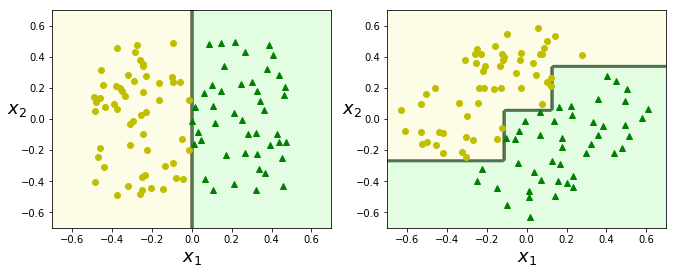

In [48]:
import numpy.random as rnd
rnd.seed(6)
Xs = rnd.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array(
    [[np.cos(angle), -np.sin(angle)], 
     [np.sin(angle), np.cos(angle)]])

Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

#save_fig("sensitivity_to_rotation_plot")
plt.show()

# left: std linearly separable dataset
# right: dataset rotated by 45degrees.

### Basic Decision Tree Learning Algorithm for Regression

Decision trees can handle both categorical and numerical data and can be used for Regression as well.

Let's see the example below:
A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target.

![1](http://www.saedsayad.com/images/Decision_tree_r1.png)

### Core Regression Algorithm

		
The core algorithm for building decision trees called ID3 by J. R. Quinlan which employs a top-down, greedy search through the space of possible branches with no backtracking. The ID3 algorithm can be used to construct a decision tree for regression by replacing Information Gain with Standard Deviation Reduction.

#### Standard Deviation

##### Standard deviation for one attribute

A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). We use standard deviation to calculate the homogeneity of a numerical sample. If the numerical sample is completely homogeneous its standard deviation is zero.		
 		
a) Standard deviation for one attribute:		

![1](http://www.saedsayad.com/images/Decision_tree_r2.png)

1. Standard Deviation (S) is for tree building (branching).

2. Coefficient of Deviation (CV) is used to decide when to stop branching. We can use Count (n) as well.

3. Average (Avg) is the value in the leaf nodes.

##### Standard deviation for two attributes (target and predictor):

![1](http://www.saedsayad.com/images/Decision_tree_r3.png)

#### Standard Deviation Reduction
The standard deviation reduction is based on the decrease in standard deviation after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest standard deviation reduction (i.e., the most homogeneous branches).		

##### Step 1: The standard deviation of the target is calculated. 		
 		
Standard deviation (Hours Played) = 9.32

 		
##### Step 2: The dataset is then split on the different attributes. 
The standard deviation for each branch is calculated. The resulting standard deviation is subtracted from the standard deviation before the split. The result is the standard deviation reduction. 		

![1](http://www.saedsayad.com/images/Decision_tree_r4.png)

![1](http://www.saedsayad.com/images/Decision_tree_r5.png)


##### Step 3: The attribute with the largest standard deviation reduction is chosen for the decision node. 

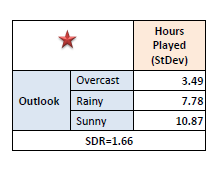

##### Step 4a: The dataset is divided based on the values of the selected attribute. This process is run recursively on the non-leaf branches, until all data is processed.	

![](http://www.saedsayad.com/images/Decision_tree_r7.png)

In practice, we need some termination criteria. For example, when coefficient of deviation (CV) for a branch becomes smaller than a certain threshold (e.g., 10%) and/or when too few instances (n) remain in the branch (e.g., 3). 		
Step 4b: "Overcast" subset does not need any further splitting because its CV (8%) is less than the threshold (10%). The related leaf node gets the average of the "Overcast" subset.		

![](http://www.saedsayad.com/images/Decision_tree_r9.png)

Because the number of data points for both branches (FALSE and TRUE) is equal or less than 3 we stop further branching and assign the average of each branch to the related leaf node.		

![](http://www.saedsayad.com/images/Decision_tree_r8.png)


##### Step 4d: Moreover, the "rainy" branch has an CV (22%) which is more than the threshold (10%). This branch needs further splitting. We select "Windy" as the best best node because it has the largest SDR.

![](http://www.saedsayad.com/images/Decision_tree_r11.png)

Because the number of data points for all three branches (Cool, Hot and Mild) is equal or less than 3 we stop further branching and assign the average of each branch to the related leaf node.

![](http://www.saedsayad.com/images/Decision_tree_r12.png)

		
When the number of instances is more than one at a leaf node we calculate the average as the final value for the target.


## Overfitting: Tree Pruning and Tree Height

#### The classic Decision Tree issues are overfitting versus underfitting. 
- Overfitting happens when a model memorizes its training data so well that it is learning noise on top of the signal.
- Underfitting is the opposite: the model is too simple to find the patterns in the data.

Simplicity versus accuracy is a similar consideration. Do you want a model that can fit onto one sheet of paper and be understood by a broad audience? Or do you want the best possible accuracy, even if it is a “black box”?



## What are the key parameters of tree modeling and how can we avoid over-fitting in decision trees?

Overfitting is one of the key challenges faced while modeling decision trees. If there is no limit set of a decision tree, it will give you 100% accuracy on training set because in the worse case it will end up making 1 leaf for each observation. Thus, preventing overfitting is pivotal while modeling a decision tree and it can be done in 2 ways:

### 1. Setting constraints on tree size
### 2. Tree pruning

Lets discuss both of these briefly.

### 1. Regularization Hyperparameters - Setting constraints on the Tree size

This can be done by using various parameters which are used to define a tree.

* *max_depth* controls max depth of the DT. Reducing *max_depth* regularizes the model, therefore reduces risk of overfit.
* Also: *min_samples_split*, *min_samples_leaf*, *min_weight_fraction_leaf*, *max_leaf_nodes*, *max_features* -- increasing min_* or reducing max_* params will regularize the model.


#### Description of some of the key features :- 

##### 1. min_samples_split : Minimum samples for a node split
Defines the minimum number of samples (or observations) which are required in a node to be considered for splitting.
Used to control over-fitting. Higher values prevent a model from learning relations which might be highly specific to the particular sample selected for a tree.
Too high values can lead to under-fitting hence, it should be tuned using CV.

##### 2. min_samples_leaf : Minimum samples for a terminal node (leaf)
Defines the minimum samples (or observations) required in a terminal node or leaf.
Used to control over-fitting similar to min_samples_split.
Generally lower values should be chosen for imbalanced class problems because the regions in which the minority class will be in majority will be very small.

##### 3. max_depth: Maximum depth of tree (vertical depth)
The maximum depth of a tree.
Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
Should be tuned using CV.

##### 4. max_leaf_nodes: Maximum number of terminal nodes
The maximum number of terminal nodes or leaves in a tree.
Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.

##### 5. max_features: Maximum features to consider for split
The number of features to consider while searching for a best split. These will be randomly selected.
As a thumb-rule, square root of the total number of features works great but we should check upto 30-40% of the total number of features.
Higher values can lead to over-fitting but depends on case to case.


### 2. Tree Pruning also known as post-pruning

The important step of tree pruning is to define a criterion be used to determine the correct final tree size using one of the following methods:

- Use a distinct dataset from the training set (called validation set), to evaluate the effect of post-pruning nodes from the tree.
- Build the tree by using the training set, then apply a statistical test to estimate whether pruning or expanding a particular node is likely to produce an improvement beyond the training set.
   - Error estimation
   - Significance testing (e.g., Chi-square test)

The first method is the most common approach. In this approach, the available data are separated into two sets of examples: a training set, which is used to build the decision tree, and a validation set, which is used to evaluate the impact of pruning the tree. The second method is also a common approach. Here, we explain the error estimation and Chi2 test. 

### Coding Examples

### BankNote Authentication Project

### Classification with Decision Tree

- Repository: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

In [105]:
import os
import tarfile
from six.moves import urllib
import requests

download_root = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
path = "datasets/dtrees"



def fetch_data(url, path):
    if not os.path.isdir(path):
        os.makedirs(path)
    download_path = os.path.join(path, "banknote_auth.txt")
    urllib.request.urlretrieve(url, download_path)
    return download_path

download_path = fetch_data(download_root, path)

In [118]:
dataset = pd.read_csv(download_path)
print(dataset.shape)
print(dataset.info())
print(dataset.describe())
print(dataset.columns)
dataset.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
print(dataset.describe())
print(dataset['class'].value_counts)

(1371, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
3.6216      1371 non-null float64
8.6661      1371 non-null float64
-2.8073     1371 non-null float64
-0.44699    1371 non-null float64
0           1371 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.6 KB
None
            3.6216       8.6661      -2.8073     -0.44699            0
count  1371.000000  1371.000000  1371.000000  1371.000000  1371.000000
mean      0.431410     1.917434     1.400694    -1.192200     0.444931
std       2.842494     5.868359     4.310105     2.101683     0.497139
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.774700    -1.711300    -1.553350    -2.417000     0.000000
50%       0.495710     2.313400     0.616630    -0.586650     0.000000
75%       2.814650     6.813100     3.181600     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Index(['3.6216', '8.6

In [120]:
X = dataset.drop('class', axis=1)  
y = dataset['class'] 

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)  

from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[149   0]
 [  2 124]]
             precision    recall  f1-score   support

          0       0.99      1.00      0.99       149
          1       1.00      0.98      0.99       126

avg / total       0.99      0.99      0.99       275



### Regression with Decision Tree

#### Data Set Information:

The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.


#### Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

#### Url
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

#### Data Url
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

In [156]:
#dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, sep="\t")
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", header=None, delimiter=r'\s+')

print(dataset.shape)
print(dataset.head(50))
print(dataset.columns)

dataset.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name' ]

print(dataset.describe())
print(dataset.info())

print(dataset.columns)
print(dataset.iloc[32])

(398, 9)
       0  1      2      3       4     5   6  7                             8
0   18.0  8  307.0  130.0  3504.0  12.0  70  1     chevrolet chevelle malibu
1   15.0  8  350.0  165.0  3693.0  11.5  70  1             buick skylark 320
2   18.0  8  318.0  150.0  3436.0  11.0  70  1            plymouth satellite
3   16.0  8  304.0  150.0  3433.0  12.0  70  1                 amc rebel sst
4   17.0  8  302.0  140.0  3449.0  10.5  70  1                   ford torino
5   15.0  8  429.0  198.0  4341.0  10.0  70  1              ford galaxie 500
6   14.0  8  454.0  220.0  4354.0   9.0  70  1              chevrolet impala
7   14.0  8  440.0  215.0  4312.0   8.5  70  1             plymouth fury iii
8   14.0  8  455.0  225.0  4425.0  10.0  70  1              pontiac catalina
9   15.0  8  390.0  190.0  3850.0   8.5  70  1            amc ambassador dpl
10  15.0  8  383.0  170.0  3563.0  10.0  70  1           dodge challenger se
11  14.0  8  340.0  160.0  3609.0   8.0  70  1            plymouth 

### Data Cleaning

##### Some data cleaning is required as certain fields contain chars such as "?". They should be replaced or the row completely removed

In [157]:
dataset['horsepower'] = pd.to_numeric(dataset['horsepower'], errors='coerce')

print(dataset.info())
print(dataset.iloc[32])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None
mpg                     25
cylinders                4
displacement            98
horsepower             NaN
weight                2046
acceleration            19
model_year              71
origin                   1
car_name        ford pinto
Name: 32, dtype: object


In [158]:
dataset['horsepower'].fillna( np.mean(dataset['horsepower'])  , inplace=True)

print(dataset.iloc[32])
#dataset['horsepower'] = dataset['horsepower'].replace('?', 
#   np.mean(  pd.to_numeric(dataset['horsepower'], errors='coerce')))

mpg                     25
cylinders                4
displacement            98
horsepower         104.469
weight                2046
acceleration            19
model_year              71
origin                   1
car_name        ford pinto
Name: 32, dtype: object


### Create Precictor and Target Variables

##### Drop 'mpg' as it the target variable. Drop 'car_name' as is 'non-numeric'

In [159]:
X = dataset.drop( ['mpg', 'car_name'], axis=1)
y = dataset['mpg']

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
dtypes: float64(4), int64(3)
memory usage: 21.8 KB
None


### Create Training and Test data

In [160]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  


### Visualize input dataaet

#### Histogram

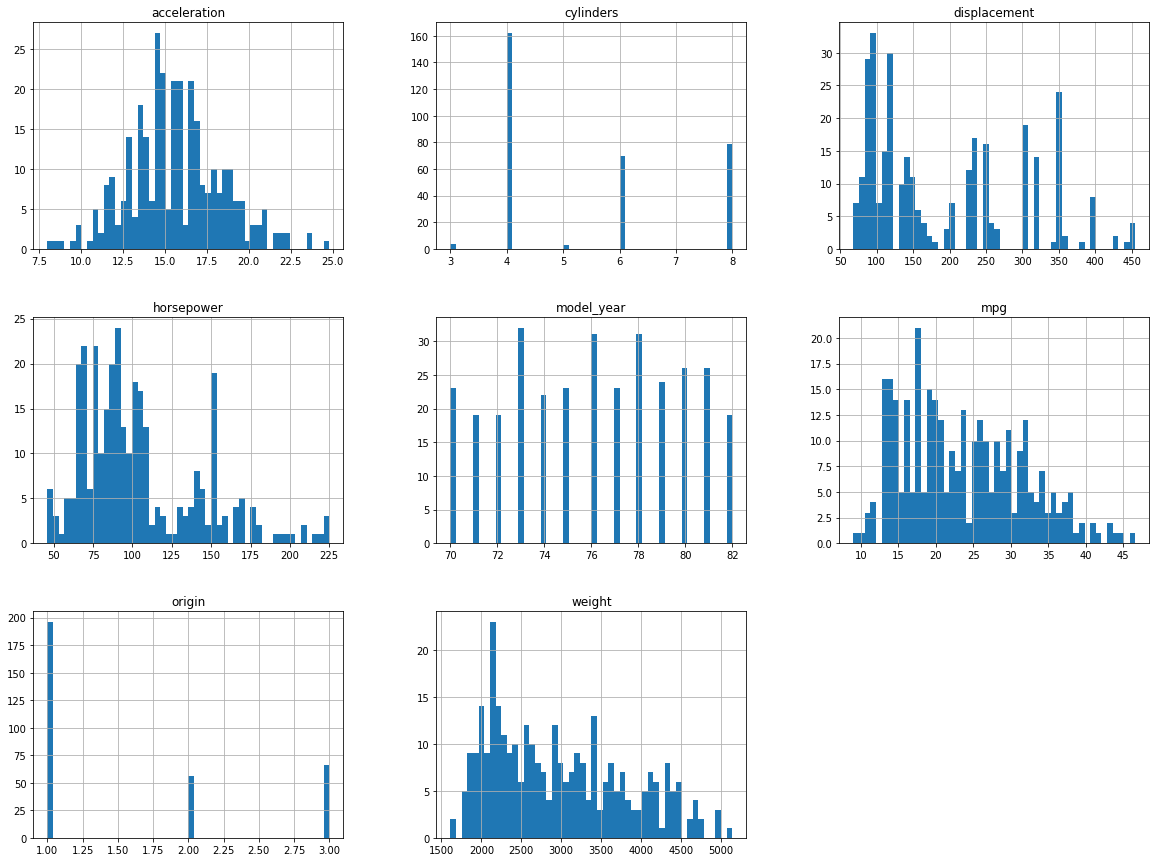

In [177]:
vis_data = X_train.copy()
vis_data['mpg'] = y_train
vis_target = y_train.copy()

vis_data.hist(bins=50, figsize=(20,15))
plt.show()

#### Correlation Matrix

In [190]:
corr_matrix = vis_data.corr()
print("\n\n", corr_matrix)

corr_mpg = corr_matrix['mpg'].sort_values(ascending=False)
print('\n\n\n', corr_mpg)





               cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.951825    0.833889  0.893808     -0.479743   
displacement   0.951825      1.000000    0.884142  0.929479     -0.512604   
horsepower     0.833889      0.884142    1.000000  0.850033     -0.666859   
weight         0.893808      0.929479    0.850033  1.000000     -0.380938   
acceleration  -0.479743     -0.512604   -0.666859 -0.380938      1.000000   
model_year    -0.372146     -0.384505   -0.424277 -0.313227      0.286697   
origin        -0.562782     -0.620072   -0.450551 -0.585384      0.203643   
mpg           -0.770459     -0.801543   -0.763704 -0.827333      0.390101   

              model_year    origin       mpg  
cylinders      -0.372146 -0.562782 -0.770459  
displacement   -0.384505 -0.620072 -0.801543  
horsepower     -0.424277 -0.450551 -0.763704  
weight         -0.313227 -0.585384 -0.827333  
acceleration    0.286697  0.203643  0.390101  
model_year      1.000

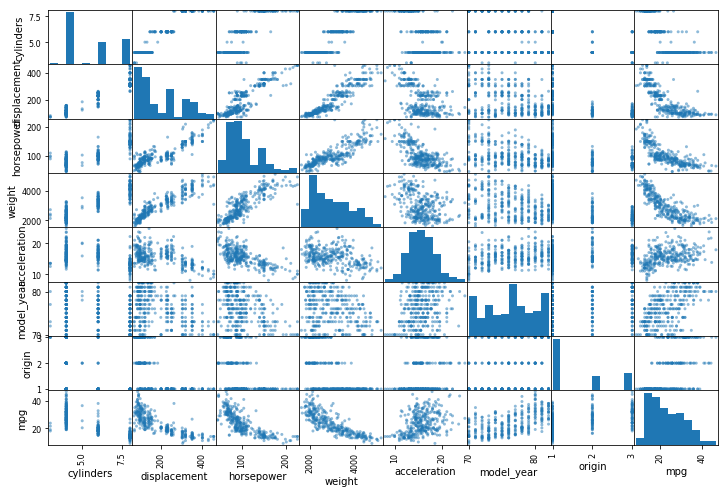

In [188]:
from pandas.plotting import scatter_matrix

attributes = vis_data.columns.values
scatter_matrix(vis_data[attributes], figsize=(12, 8))

plt.show()



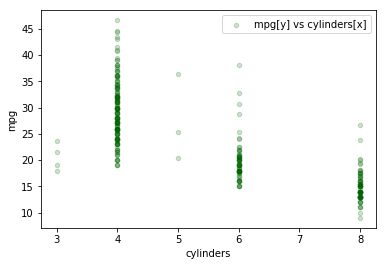

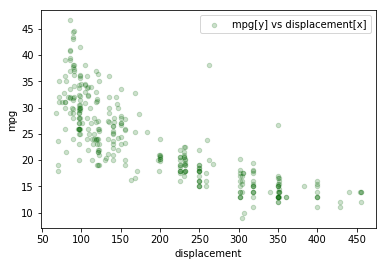

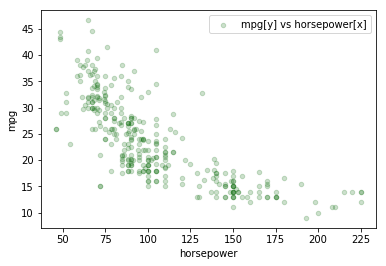

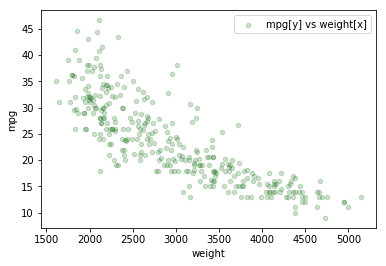

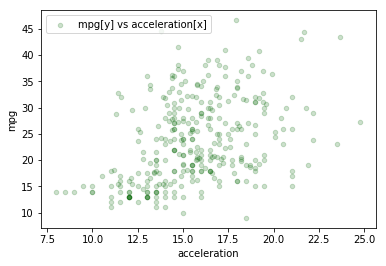

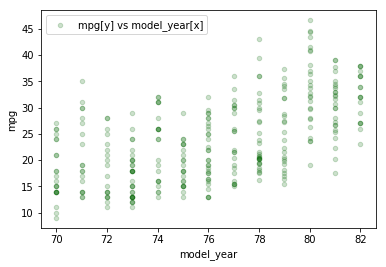

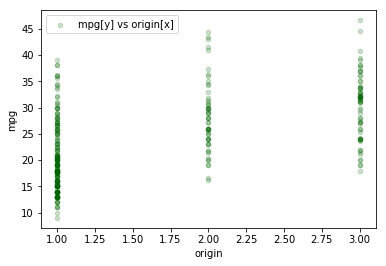

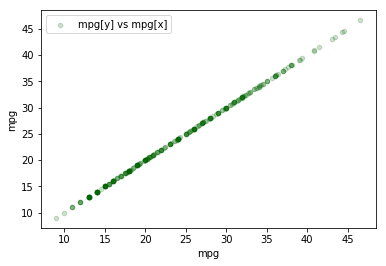

In [209]:
colors = {
    0 : 'DarkBlue',
    1 : 'DarkGreen',
    2 : 'Red',
    3 : 'Orange'
}

for names in vis_data.columns.values:
    #print (names)
    colors_array = np.random.randint(4, size=1)
    color_index_random = col[0]
    vis_data.plot(kind="scatter", x=names, y='mpg', alpha=0.2, 
                  color=colors[color_index_random], label="mpg[y] vs " + names + "[x]")
    
#plt.axis([0, 0, 50])
plt.show()


#### Plotting multiple graphs on the same figure, sample below

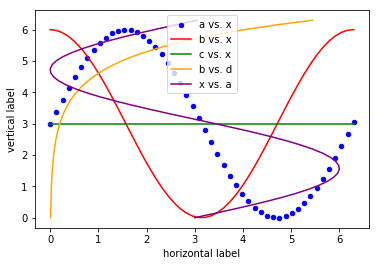

In [210]:
x = np.linspace(0,6.3, 50)
a = (np.sin(x)+1)*3
b = (np.cos(x)+1)*3
c = np.ones_like(x)*3
d = np.exp(x)/100.
df = pd.DataFrame({"x":x, "a":a, "b":b, "c":c, "d":d})

ax = df.plot(kind="scatter", x="x",y="a", color="b", label="a vs. x")
df.plot(x="x",y="b", color="r", label="b vs. x", ax=ax)
df.plot( x="x",y="c", color="g", label="c vs. x", ax=ax)
df.plot( x="d",y="x", color="orange", label="b vs. d", ax=ax)
df.plot( x="a",y="x", color="purple", label="x vs. a", ax=ax)

ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()

### Train the Decision Tree Regressor ( not classifier )

In [237]:
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train)  
print(X_train.__class__)
print(y_train.__class__)
print(X_train.columns.tolist())



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']



#### Visualize the Tree

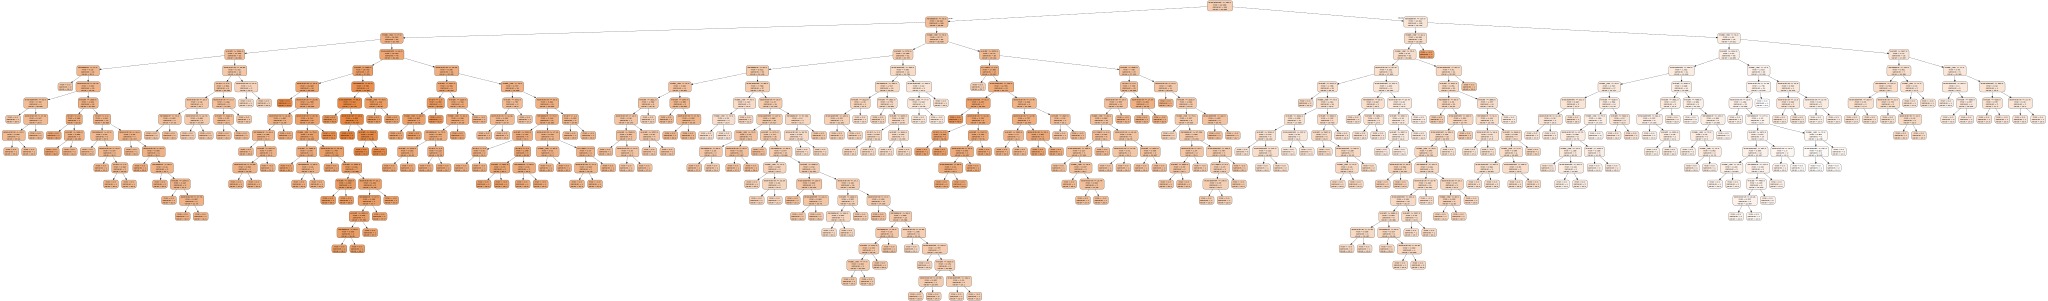

In [241]:
import graphviz

# vis_data = X_train.copy()
dot_data1 = export_graphviz(regressor,
               out_file=None,
                feature_names=X_train.columns.tolist(),
                class_names=['mpg'],
                rounded=True,
                filled=True
               )


graph = graphviz.Source(dot_data1)

# Saves the graph to iris.pdf file
graph.render("banknote_reg")

# Matplotlib inline drawing of graph
graph

##### Having trained the Regressor, now user the test data for predictions

In [171]:
y_pred = regressor.predict(X_test)

df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  

mean_y_test = np.mean(y_test)
mean_y_dataset = np.mean( dataset['mpg'])

from sklearn import metrics  
print('\n\nMean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

print("\n\nMean of 'mpg' in y_test: ", mean_y_test)
print("10%  of mean of 'mpg' in y_test: ", (0.1*mean_y_test))

print("\n\nMean of 'mpg' in original dataset: ", mean_y_dataset)
print("10%  of mean of 'mpg' in original: ", (0.1*mean_y_dataset))





Mean Absolute Error: 2.28875
Mean Squared Error: 11.590375
Root Mean Squared Error: 3.404463981304546


Mean of 'mpg' in y_test:  23.142500000000002
10%  of mean of 'mpg' in y_test:  2.3142500000000004


Mean of 'mpg' in original dataset:  23.514572864321607
10%  of mean of 'mpg' in original:  2.351457286432161


##### The mean absolute error for our algorithm is 2.28, which is less than 10 percent of the mean of all the values in the 'mpg' column. 
This means that our algorithm did a fine prediction job.